In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import seaborn as sns
sns.set_palette('colorblind')

import os
from os.path import join

import json
import numpy as np
import torch

#print(os.listdir('results'))
#print("\n")
#print(os.listdir(join('results', 'torchbeast-20200804-204148')))
#print("\n")
#print(open(join('results', 'torchbeast-20200804-204148', 'meta.json'), 'r').read())
#print("\n")
#print(pd.read_csv(join('results', 'torchbeast-20200804-204148', 'logs.csv')).keys())

'# _tick', 
'_time',
'frames',
'total_loss',
'mean_episode_return',
'pg_loss',
'baseline_loss',
'entropy_loss',
'mean_rewards',
'mean_intrinsic_rewards',
'mean_total_rewards',
'mean_action_rewards',
'mean_count_rewards'

torchbeast-20201203-102408
torchbeast-20201204-092348
torchbeast-20201202-105739
torchbeast-20201205-025536
torchbeast-20201126-024342
pathological_RAM


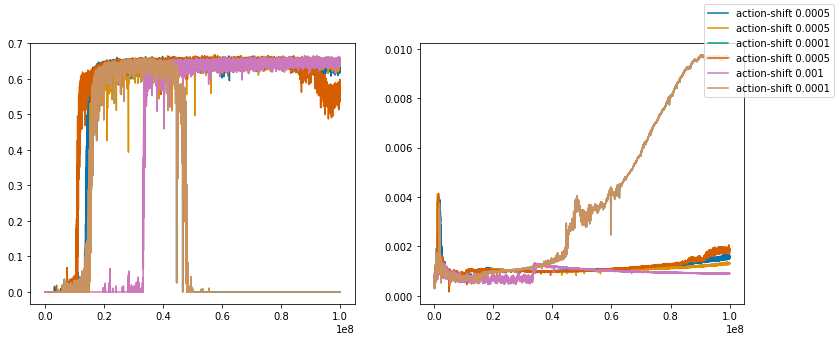

In [3]:
results_dir = './'

f = plt.figure(figsize=[6.4*2, 4.8])
f_ret = f.add_subplot(1,2,1)
f_intr = f.add_subplot(1,2,2)


labels = []
for d in os.listdir(results_dir):
    results_path = join(results_dir, d, 'logs.csv')   
    
    
    #if "patho" in d:
    #    continue
    
    try:
        res = pd.read_csv(results_path)
    except (FileNotFoundError, NotADirectoryError):
        continue
        
    meta_json = json.load(open(join(results_dir, d, 'meta.json'), 'r')) 
    args = meta_json["args"]

    try:
        name = args["model"] + " " + str(float(args["action_dist_decay_coef"])) + " " + str(args["intrinsic_reward_coef"])
        name = args["model"] + " " + str(args["entropy_cost"])#+ " " + str(float(args["action_dist_decay_coef"])) + " " + str(args["intrinsic_reward_coef"])
        
    except KeyError:
        name = args["model"]
        
    if "action" not in name:
        continue
        
    #if '4.0' not in name and 'ride' not in name:
    #   continue
    
    #if 'action-shift 4.0' not in name:
    #   continue
    
    #if 'ride' not in name:
    #    continue
        
    print(d)
    f_ret.plot(res['frames'], res['mean_episode_return'])
    try:
        f_intr.plot(res['frames'], res['mean_intrinsic_rewards'])
    except KeyError:
        pass
    
    labels.append(name)
    

#mean_ep_paper = np.zeros(len(res['frames']))
#mean_ep_paper[res['frames'] > 5000000] = 0.79
#striding = np.logical_and(res['frames'] > 2500000, res['frames'] < 5000000)
#mean_ep_paper[striding] = np.linspace(0, 0.79, striding.sum())

#f_ret.plot(res['frames'], mean_ep_paper)
#labels.append('ride_paper')
    
f.legend(labels, loc='upper right')

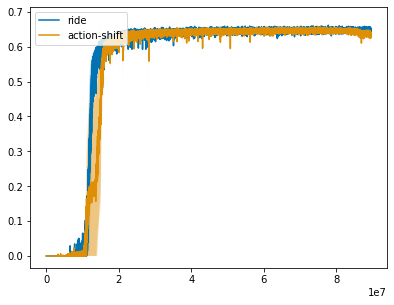

In [86]:
results_dir = './'

f = plt.figure(figsize=[6.4, 4.8])

last_time_index = 28000
ride_res = []
action_shift_res = []

for d in os.listdir(results_dir):
    if os.path.isfile(join(results_dir, d)):
        continue
    
    results_path = join(results_dir, d, 'logs.csv') 
    model_path = join(results_dir, d, 'model.tar')
    
    if "pathological" in d or "-024342" in d or "-105739" in d:
        continue
    
    try:
        res = pd.read_csv(results_path)
    except FileNotFoundError:
        continue
        
    meta_json = json.load(open(join(results_dir, d, 'meta.json'), 'r')) 
    args = meta_json["args"]

    try:
        name = args["model"] + " " + str(float(args["action_dist_decay_coef"])) + " " + str(args["intrinsic_reward_coef"])
    except KeyError:
        name = 'ride'
        
    if 'action-shift' in name:
        action_shift_res.append(res['mean_episode_return'][:last_time_index])
    
    if 'ride' in name:
        ride_res.append(res['mean_episode_return'][:last_time_index])
    
ride_res = np.stack(ride_res)
action_shift_res = np.stack(action_shift_res)
    
    
frames = res['frames'][:last_time_index]
ride_mean = ride_res.mean(axis=0)
ride_std = ride_res.std(axis=0)

plt.plot(frames, ride_mean)
plt.fill_between(frames, ride_mean + ride_std, ride_mean - ride_std, alpha=0.5)

action_shift_mean = action_shift_res.mean(axis=0)
action_shift_std = action_shift_res.std(axis=0)

plt.plot(frames, action_shift_mean)
plt.fill_between(frames, np.maximum(0, action_shift_mean - action_shift_std), action_shift_mean + action_shift_std, alpha=0.5)

plt.legend(['ride', 'action-shift'], loc='upper left')
plt.savefig('MultiRoom-action')

In [47]:
pathological_ram_model = "pathological_RAM/action_hist.tar"
model = torch.load(pathological_ram_model, map_location=torch.device('cpu'))
model[-1]#['usage'].type()

{'usage': tensor([46222956.,  5962952., 40127120.,   131073.,   120211.,  8300879.,
           144508.]),
 'acted': tensor([1.5822e+07, 5.9630e+06, 3.9783e+07, 7.8400e+02, 6.0700e+02, 7.8674e+06,
         5.8900e+02])}

In [48]:
model[-1]['acted'] / model[-1]['usage']

tensor([0.3423, 1.0000, 0.9914, 0.0060, 0.0050, 0.9478, 0.0041])

In [50]:
model[-3]['acted'] / model[-3]['usage']

tensor([0.3412, 1.0000, 0.9913, 0.0060, 0.0050, 0.9472, 0.0041])

In [70]:
acted = [model[i]['acted'][0] for i in range(len(model))]
acted = torch.stack(acted)
print(acted)

usage = [model[i]['usage'][0] for i in range(len(model))]
usage = torch.stack(usage)
print(usage)

tensor([  116758.,   162989.,   209977.,   326822.,   523386.,   711447.,
          855506.,   985705.,  1118510.,  1211797.,  1284451.,  1357020.,
         1448714.,  1548556.,  1672303.,  2030261.,  3626639.,  5130810.,
         6519155.,  7473323.,  8879186.,  9679352., 10348760., 10709798.,
        11146021., 11527916., 11917862., 12379538., 12950049., 13809183.,
        14670460., 15586311., 15822292.])
tensor([  116758.,   162989.,   209977.,   326822.,   523859.,   767196.,
         1002961.,  1229999.,  1470007.,  1710571.,  1948148.,  2196392.,
         2488118.,  2814713.,  3181737.,  4011249.,  6053506.,  8656098.,
        11227228., 13712767., 16460392., 19059794., 21709138., 24370712.,
        26924920., 29682332., 32354422., 35021112., 37723604., 40269724.,
        42993424., 45657560., 46222956.])


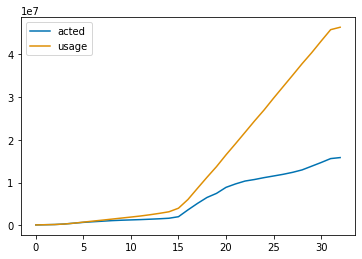

In [69]:
plt.plot(acted, label='acted')
plt.plot(usage, label='usage')
plt.legend()